# Plot Label Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import hdf5storage as hdf
import scipy.io as sio

import os

sns.set_style('darkgrid')

In [2]:
# !pip install hdf5storage

In [3]:
def plot_label_distribution(dataset, save_path=None, fontFm='Arial', fontsize=14):
    try:
        data = sio.loadmat(f'new_datasets/{dataset}.mat')
    except:
        data = hdf.loadmat(f'new_datasets/{dataset}.mat')
    gnd = data['gnd'].flatten()

    label_count = []
    labels = set(gnd)
    for label in labels:
        label_count.append(sum(gnd == label))
    
    # plot bar
    plt.rcParams["font.family"] = fontFm
    x = np.arange(len(labels))

    plt.figure()
    plt.bar(x, sorted(label_count, reverse=True))
    plt.xlim([-0.5, x[-1]+0.5])
    plt.xticks([])
    plt.ylabel('#Samples', fontsize=fontsize)
    plt.xlabel('Label', fontsize=fontsize)
    plt.title(dataset, fontsize=fontsize)

    if save_path is not None:
        plt.savefig(f'{save_path}/{dataset}_label_dis.png', bbox_inches='tight', dpi=300)

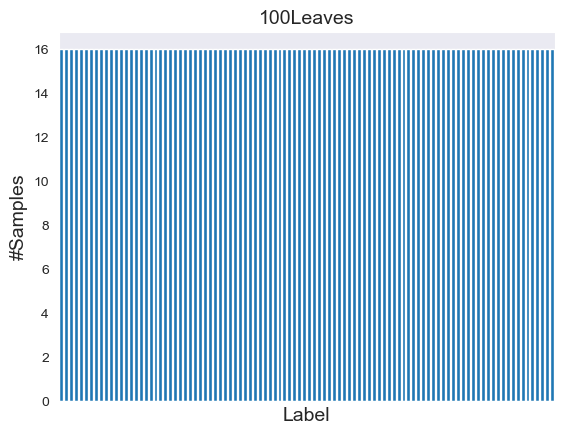

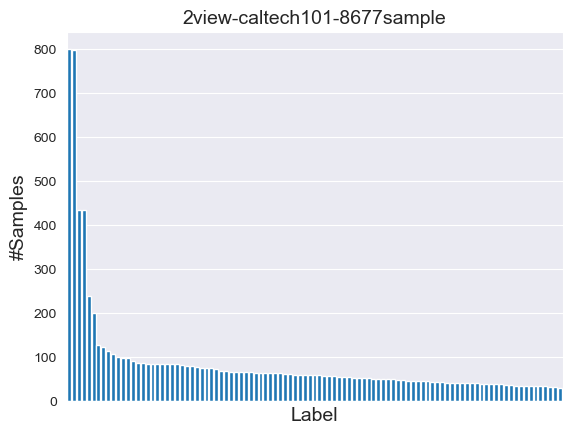

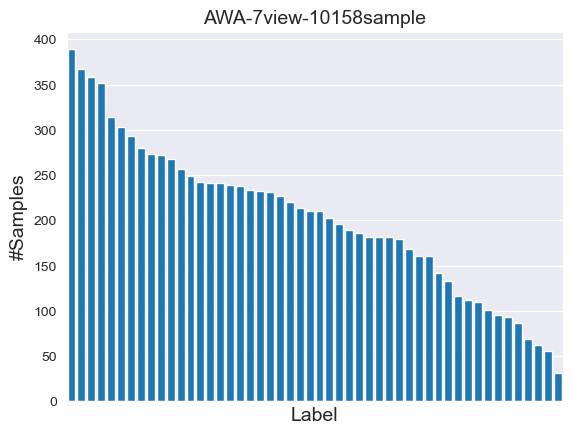

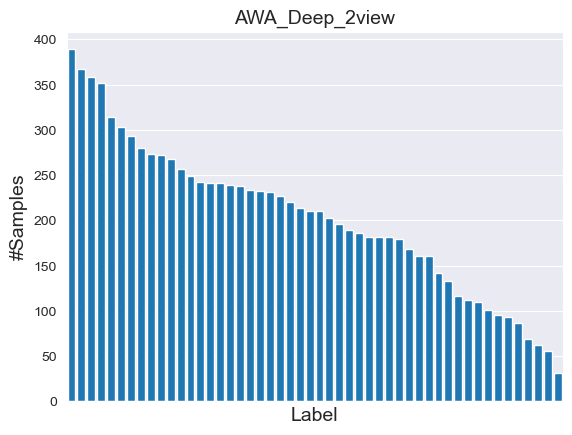

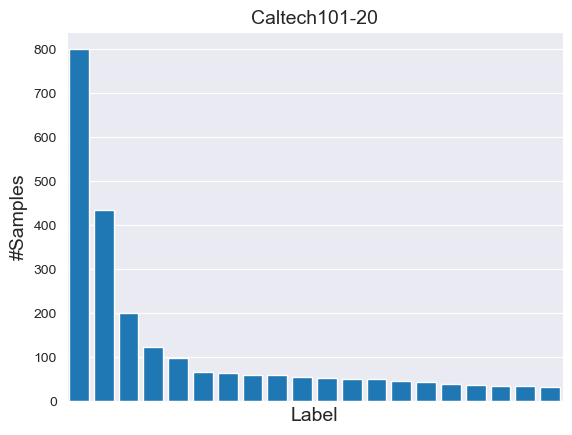

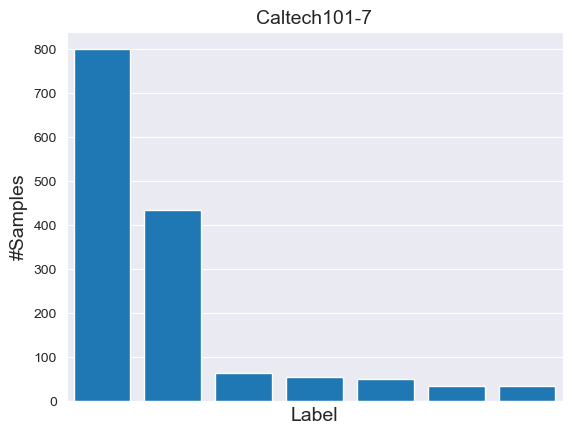

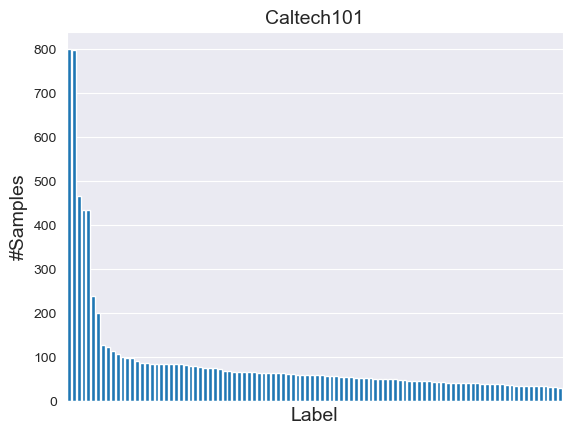

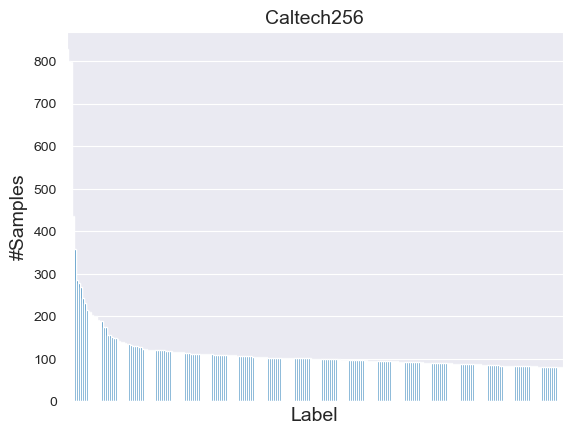

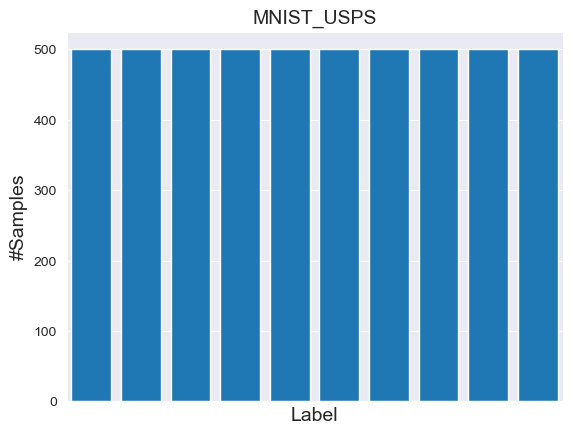

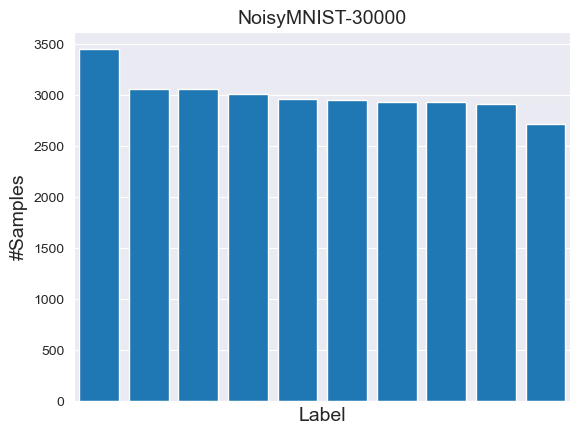

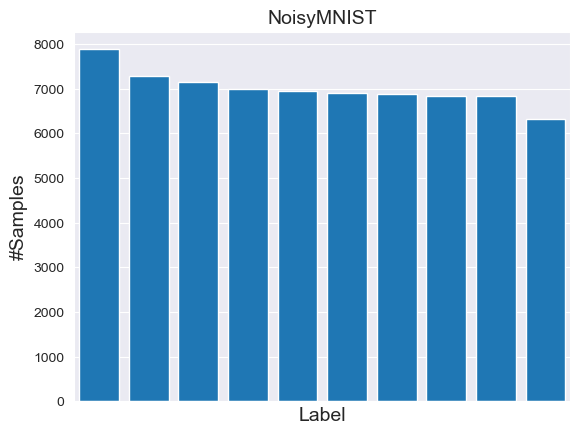

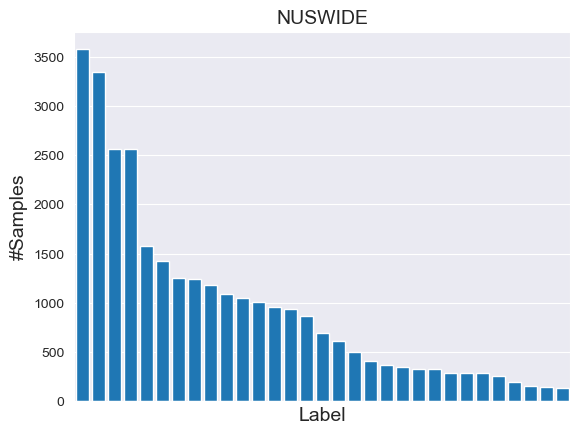

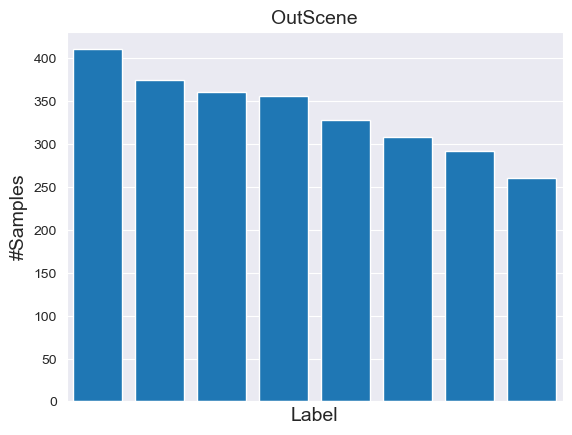

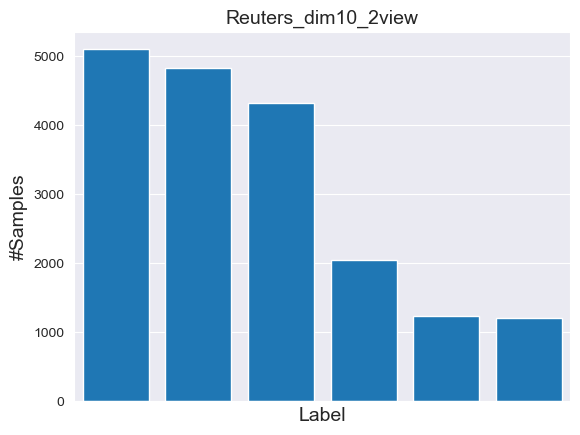

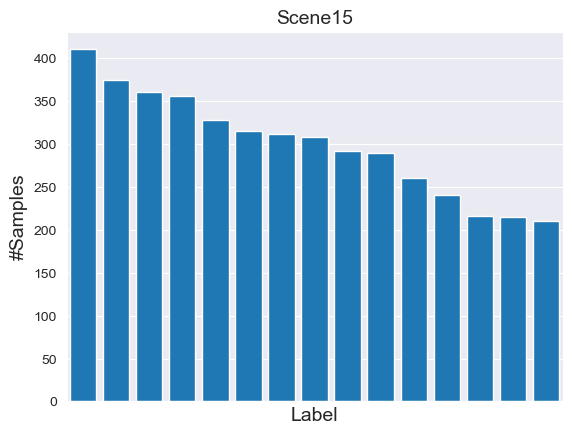

In [4]:
files_name = [file for file in os.listdir('./new_datasets/')]
ds_list = []
for file in files_name:
    if file[-3:] == 'mat':
        ds_list.append(file[:-4])

for ds in ds_list:
    plot_label_distribution(ds, save_path='label_distribution_figs')